In [6]:
# sctour virtual environment

# based on https://github.com/linnykos/veloUncertainty/blob/main/code/yuhong/larry/sct_5transMat.py

import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import sctour as sct

In [5]:
adata = sc.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup0_sctour_larry.h5ad")

adata

AnnData object with n_obs × n_vars = 49302 × 2000
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'ptime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'data_des', 'hvg'
    obsm: 'X_TNODE', 'X_VF', 'X_clone', 'X_emb'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [7]:
adata = adata[np.argsort(adata.obs['ptime'].values), :]
sc.pp.neighbors(adata, use_rep='X_TNODE', n_neighbors=15)
sc.tl.umap(adata, min_dist=0.1)

/home/users/kzlin/miniconda3/envs/sctour/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/users/kzlin/miniconda3/envs/sctour/lib/python3.9/site-packages/sctour/vector_field.py:109: RuntimeWarning: invalid value encountered in divide
  cos_sim = np.einsum("ij, j", dZ, V[i]) / (l2_norm(dZ, axis = 1) * l2_norm(V[i]))


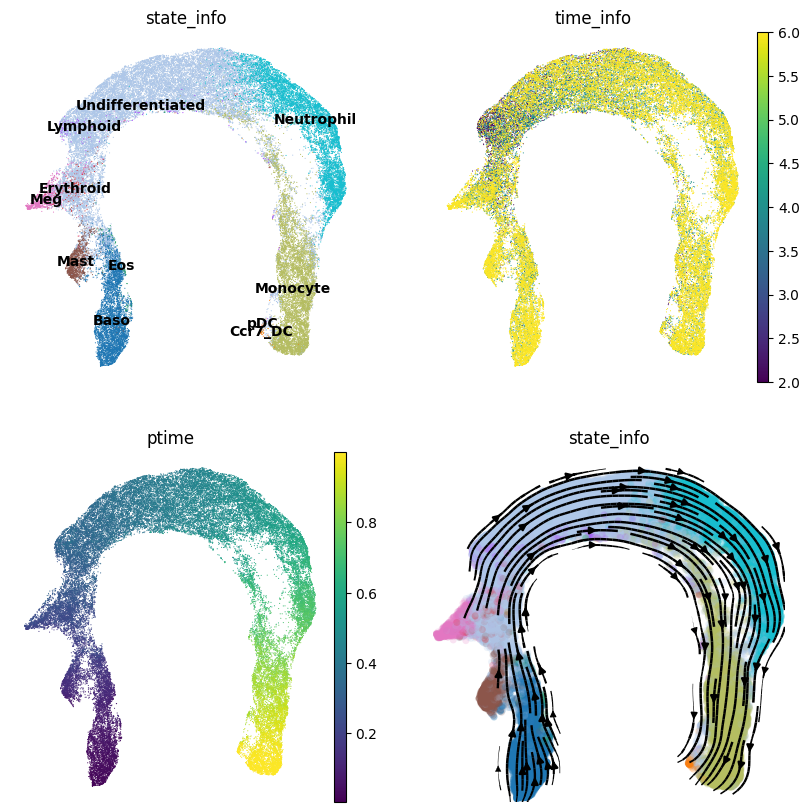

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
sc.pl.umap(adata, color='state_info', ax=axs[0, 0], legend_loc='on data', show=False, frameon=False)
sc.pl.umap(adata, color='time_info', ax=axs[0, 1], legend_loc='on data', show=False, frameon=False)
sc.pl.umap(adata, color='ptime', ax=axs[1, 0], show=False, frameon=False)
sct.vf.plot_vector_field(adata, 
                         zs_key='X_TNODE', 
                         vf_key='X_VF', 
                         use_rep_neigh='X_TNODE', 
                         color='state_info', 
                         show=False, ax=axs[1, 1], 
                         legend_loc='none', 
                         frameon=False, 
                         size=100, 
                         alpha=0.2)
plt.show()